In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 

In [2]:

import tensorflow as tf 


Using TensorFlow backend.


# Data preprocessing :\

In [104]:
#import the dataset
data = pd.read_csv("./ner.csv", encoding = "ISO-8859-1", error_bad_lines=False)

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [96]:
#exploring the data
data.tail(20)

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
1050775,1048555,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,nearbi,JJ,lowercase,nearby,lowercase,village,47957.0,punct,.,O
1050776,1048556,they,say,not,RB,lowercase,not,VBP,lowercase,say,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,47958.0,capitalized,They,O
1050777,1048557,say,not,all,DT,lowercase,all,RB,lowercase,not,...,__start1__,__START1__,wildcard,__START1__,capitalized,They,47958.0,lowercase,say,O
1050778,1048558,not,all,of,IN,lowercase,of,DT,lowercase,all,...,they,PRP,capitalized,They,lowercase,say,47958.0,lowercase,not,O
1050779,1048559,all,of,the,DT,lowercase,the,IN,lowercase,of,...,say,VBP,lowercase,say,lowercase,not,47958.0,lowercase,all,O
1050780,1048560,of,the,rocket,NNS,lowercase,rockets,DT,lowercase,the,...,not,RB,lowercase,not,lowercase,all,47958.0,lowercase,of,O
1050781,1048561,the,rocket,explod,VBD,lowercase,exploded,NNS,lowercase,rockets,...,all,DT,lowercase,all,lowercase,of,47958.0,lowercase,the,O
1050782,1048562,rocket,explod,upon,IN,lowercase,upon,VBD,lowercase,exploded,...,of,IN,lowercase,of,lowercase,the,47958.0,lowercase,rockets,O
1050783,1048563,explod,upon,impact,NN,lowercase,impact,IN,lowercase,upon,...,the,DT,lowercase,the,lowercase,rockets,47958.0,lowercase,exploded,O
1050784,1048564,upon,impact,.,.,punct,.,NN,lowercase,impact,...,rocket,NNS,lowercase,rockets,lowercase,exploded,47958.0,lowercase,upon,O


In [105]:
#dropping the unnecessary columns  and nans
dataset=data.drop(['Unnamed: 0', 'lemma', 'next-lemma', 'next-next-lemma', 'next-next-pos',
       'next-next-shape', 'next-next-word', 'next-pos', 'next-shape',
       'next-word', 'prev-iob', 'prev-lemma', 'prev-pos',
       'prev-prev-iob', 'prev-prev-lemma', 'prev-prev-pos', 'prev-prev-shape',
       'prev-prev-word', 'prev-shape', 'prev-word',"shape"],axis=1)
#dataset = dataset.dropna()

In [106]:
#length of the dataset
len(dataset)
data = data.fillna(method="ffill")

In [107]:

dataset.tail(90)

,pos,sentence_idx,word,tag
1050705,IN,47954.0,of,O
1050706,DT,47954.0,the,O
1050707,NN,47954.0,extremist,O
1050708,NN,47954.0,group,O
1050709,VBP,47954.0,continue,O
1050710,TO,47954.0,to,O
1050711,VB,47954.0,fight,O
1050712,JJ,47954.0,Afghan,B-gpe
1050713,CC,47954.0,and,O
1050714,JJ,47954.0,foreign,O


In [108]:
def sentence_to_array_converter(dataframe):
    agg_func = lambda s: [(w,p, t) for w,p, t in zip(s["word"].values.tolist(),
                                                     s['pos'].values.tolist(), s["tag"].values.tolist())]
    grouped = dataframe.groupby("sentence_idx").apply(agg_func)
    sentences=grouped.values.tolist()
    array=[]
    for sentence in sentences:
        endvalue=len(sentence)//2
        array.append(sentence[0:endvalue])
    return array

In [109]:
#converting the discrete set of text to meaning full words
sentences=sentence_to_array_converter(dataset)
print(sentences[0:1])

[[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]]


In [10]:
len(sentences)

35177

In [110]:
#getting the maximum sequence length so that will be using for padding in the lstm
length_array=[len(s) for s in sentences]
max_len = max(length_array)
print ('Maximum sequence length:', max_len)
#len(length_array)

Maximum sequence length: 70


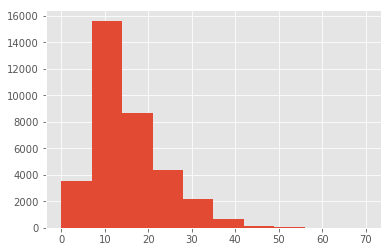

In [111]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences])
plt.show()

In [112]:
#making set for all words in the dataset and append endpad at last for convience
words = list(set(dataset["word"].values))
words.append("ENDPAD")
#words

In [113]:
#number of words 
n_words = len(words);
print(n_words)

30174


In [114]:
#making set for all words in the dataset and append endpad at last for convience
tags = list(set(dataset["tag"].values))
print(len(tags))
# import pickle

# f = open('tags.pckl', 'wb')
# pickle.dump(tags, f)
# f.close()

# f = open('store.pckl', 'rb')
# obj = pickle.load(f)
# f.close()

18


In [72]:
#creating the vocabualary for words and the tags with the index words
max_len = 70
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
len(tag2idx)

18

# Kerasssss!!!!!!!!! xD


In [115]:
#pading the sequence
from keras.preprocessing.sequence import pad_sequences


In [116]:
#converting the words to index based on vocabulary
X=[]
for sentence in sentences:
    Y=[]
    for w in  sentence:
        index=word2idx[w[0]]
        Y.append(index)
    X.append(Y) 
    

In [117]:
y=[]
for sentence in sentences:
    Y=[]
    for w in sentence:
        index=tag2idx[w[2]]
        Y.append(index)
    y.append(Y)

In [25]:
# y[0]

In [126]:
# y = [[tag2idx[w[2]] for w in s] for s in sentences]
# y[1]

In [143]:
# value=n_words - 1
# value
# word2idx["ENDPAD"]==value

In [118]:
tag2idx

{nan: 0,
 'B-per': 1,
 'O': 2,
 'I-art': 3,
 'B-geo': 4,
 'I-org': 5,
 'B-art': 7,
 'I-tim': 8,
 'B-org': 9,
 'I-per': 10,
 'B-eve': 6,
 'B-nat': 11,
 'I-nat': 12,
 'I-eve': 13,
 'I-gpe': 14,
 'I-geo': 15,
 'B-gpe': 16,
 'B-tim': 17}

In [119]:
#now we are going to pad the sentences using keras pad_sequnces class with ENDPAD for X and 'O' for y
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)
y=pad_sequences(maxlen=max_len,sequences=y,padding="post",value=tag2idx["O"])


In [120]:
#categorical value encoding
from keras.utils import to_categorical
n_tags=len(tag2idx)

In [121]:
y = np.array([to_categorical(i, num_classes=n_tags) for i in y])

In [122]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bidirectional LSTM !!!!! XD

In [123]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [124]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=70, input_length=max_len)(input)
model = Dropout(0.3)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.2))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer
model = Model(input, out)

In [125]:
#model complle
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

# Just train !!!!!!!

In [126]:
#fitting the model with Train and validation sets
history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=5, validation_split=0.4, verbose=1)


Train on 16884 samples, validate on 11257 samples
Epoch 1/5
16884/16884 [==============================] - 91s 5ms/step - loss: 0.1632 - acc: 0.9651 - val_loss: 0.0798 - val_acc: 0.9768
Epoch 2/5
16884/16884 [==============================] - 91s 5ms/step - loss: 0.0593 - acc: 0.9835 - val_loss: 0.0475 - val_acc: 0.9868
Epoch 3/5
16884/16884 [==============================] - 87s 5ms/step - loss: 0.0388 - acc: 0.9891 - val_loss: 0.0374 - val_acc: 0.9894
Epoch 4/5
16884/16884 [==============================] - 90s 5ms/step - loss: 0.0310 - acc: 0.9912 - val_loss: 0.0336 - val_acc: 0.9903
Epoch 5/5
16884/16884 [==============================] - 86s 5ms/step - loss: 0.0268 - acc: 0.9923 - val_loss: 0.0319 - val_acc: 0.9908


In [111]:
# import pickle

# f = open('storeTag.pckl', 'wb')
# pickle.dump(tag2idx, f)
# f.close()

# f = open('storeTag.pckl', 'rb')
# obj = pickle.load(f)
# f.close()

# f = open('storeTag.pckl', 'rb')
# obj = pickle.load(f)
# f.close()


In [ ]:
#

In [127]:
#saving the models
# serialize model to JSON
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [128]:
hist = pd.DataFrame(history.history)


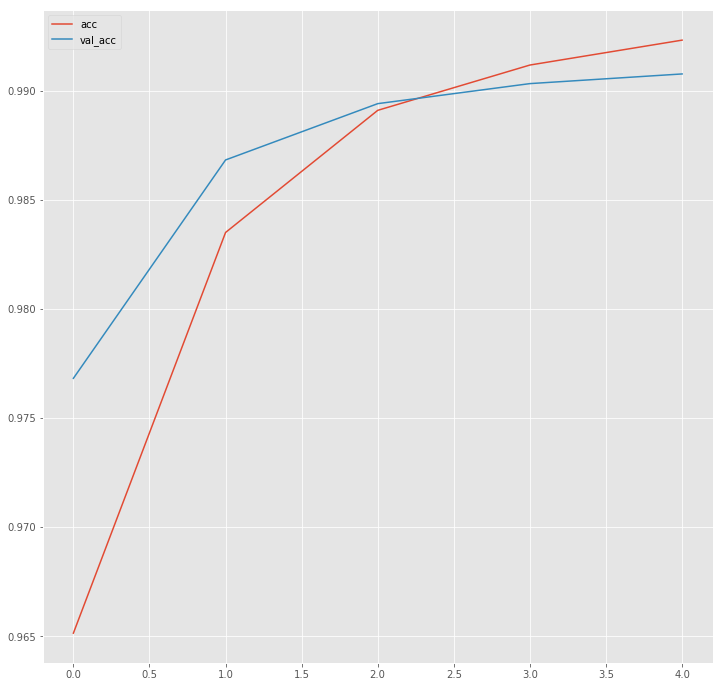

In [129]:
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

plt.legend()


In [135]:
#
i = 1
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

Word           ||True ||Pred
supervises     : B-gpe B-gpe
high-profile   : O     O
Aleman         : O     O
Bravo          : O     O
119            : O     O
remain         : O     O
al-Maliki      : O     O
destabilized   : O     O
contry         : O     O
possible       : O     O
Nayef          : O     O
Ladi           : O     O
guest-worker   : O     B-per
anxious        : B-gpe B-gpe
touching       : O     O
footlocker     : O     O
more-profitable: O     O
art            : O     O
incarceration  : O     O
long-condemned : O     O
Alex           : O     O
mentioned      : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland       : O     O
Portland 

In [40]:
import nltk

In [118]:
# X_test_sent=X_test[0]

In [172]:
test_sentence = ""
test_sentence=  nltk.word_tokenize(test_sentence)

In [270]:
# test_sentence = ["heavy" ,"rain" ,"in","pallikaranai","."]


In [169]:

max_len

70

In [266]:
# test_sentence = ["Hawking", "was", "a", "Fellow", "of", "the", "Royal", "Society", ",", "a", "lifetime", "member",
#                  "of", "the", "Pontifical", "Academy", "of", "Sciences", ",", "and", "a", "recipient", "of",
#                  "the", "Presidential", "Medal", "of", "Freedom", ",", "the", "highest", "civilian", "award",
#                  "in", "the", "United", "States", "."]
# #est_sentence=["this","is","vinod"]

In [173]:
x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in test_sentence]],
                            padding="post", value=0, maxlen=max_len)

In [174]:
p = model.predict(np.array([x_test_sent[0]]))

p = np.argmax(p, axis=-1)
print("{:15}||{}".format("Word", "Prediction"))
print(30 * "=")
for w, pred in zip(test_sentence, p[0]):
    print("{:15}: {:5}".format(w, tags[pred]))

Word           ||Prediction
Node           : O    
js             : O    
uses           : O    
V8             : O    
engine         : O    


# Thilak is my god !!!